# Capstone 2 Project - IPL Match Outcome Predictor    



<img src="https://github.com/sunilayyaps/datascience/blob/master/capstone-project2/ipl/images/vivo-ipl-2018.jpg?raw=true">

# Indian Premier League - Introduction
IPL competition is played amongst 8 elite clubs. The format of the game is very simple – each team will face the other 7 teams twice once in their home ground and then in other team’s ground. At the end of all the 56 matches, the top four will qualify for the playoff. The first two ranked team will play against each other in Qualifier 1 and the third and fourth team will play against each other in Qualifier 2. The winner of Qualifier 1 one will be qualified for the final and the loser will play against the winner of Qualifier 2 in the Eliminator. 

Group games do not necessarily end with one side winning. They can either have ‘no result’ if weather prevents the game from being finished or be ‘Super-over if both teams end on the same score. In the knock out rounds, ‘no result’ games are replayed on a reserve day and ‘tied’ matches are decided by ‘super-over, ensuring that there is always a winner.

In each IPL team, a total of 11 players will play the match and it must comprise of 7 Indians and 4 foreign players. The rule of 7 Indians is mandatory and was introduced to promote local players. So one of the challenges all the team faces in each match is to select the 4 foreign players from a total of 8 players. 

**I am trying to solve three problems **

**1. Predict the outcome**
To predict the result of a T-20 IPL match based on various parameters such Home advantage, First Bat, Ground conditions, Toss, Team combinations. 

**2. To assist the coach & captain in team selection** 
Who should be included on each grounds against each opposition? Who is probably going to perform better? 

**3. Fantasy League Prediction**
What should be the composition of your fantasy league team? Fantasy league team is a visual game played by the cricket fans. In a day, the fans are allowed to pick their playing 11 from the four teams who play on a day. 


### Steps for predicting the outcome
1. We will clean our dataset
2. Split it into training and testing data (12 features & 1 target (winning team (Home/Away/Tie))
3. Train 3 different classifiers on the data -Logistic Regression -Support Vector Machine -XGBoost
4. Use the best Classifer to predict who will win given an away team and a home team




In [1]:
%%html
<style>
table {float:left}
</style>

## Previous IPL Winners


|YEAR | WINNERS | RUNNERS-UP | 
|-- | -- | -- |
|2008 | Rajasthan Royals | Chennai Super Kings | 
|2009 | Deccan Chargers | Royal Challengers Bangalore | 
|2010 | Chennai Super Kings | Mumbai Indians | 
|2011 | Chennai Super Kings | Royal Challengers Bangalore | 
|2012 | Kolkata Knight Riders | Chennai Super Kings | 
|2013 | Mumbai Indians | Chennai Super Kings | 
|2014 | Kolkata Knight Riders | Kings XI Punjab |
|2015 | Mumbai Indians | Chennai Super Kings | 
|2016 | Sunrisers Hyderabad | Royal Challengers Bangalore
|2017 | Mumbai Indians | Pune Supergiants   


## Some Data Points to Consider
- In 2008 IPL started with 8 teams - Chennai Super Kings, Rajasthan Royals, Kolkata Knight Riders, Mumbai Indians, Kings XI, Deccan Chargers, Royal Challengers, Delhi DareDevils
- In 2011 - Two more teams were introduced - Pune Warriors and Kochi Tuskers. But after 2013, both these teams were terminated for breaching its terms of agreement.
- In 2013 - Deccan chargers were sold & renamed as Sunrisers Hyderabad.
- In 2016 - Two popular teams who were previous champions Chennai Super Kings and Rajasthan Royals was suspended for two years. Just to keep up with the number of matches two new teams Pune Supergiants and Gujarat Lions took their place and played 2016 and 2017 season
- In 2018 - Both the suspended teams are returning replacing the Pune Supergiants and Gujarat Lions
- In our datasets, you will be seeing this inconsistency in the team accross the season. This is not a data issue but because of all the events happened. 

## Labels
<div class="span10 alert alert-danger">
<b>Important Note</b>
</div>  

<div class="span10 alert alert-warning">
<b>Warning Note</b>
</div>  

<div class="span10 alert alert-info">
<b>Info</b>
</div> 

## Important Info
<div class="span25 alert alert-danger">

<b> For easy reading all teams will be referred by their ABBR in notes and in charts </b>  
<br>
- Rajasthan Royals - RR  <br>
- Chennai Super Kings - CSK  <br>
- Mumbai Indians - MI  <br>
- Royal Challengers Bangalore - RCB <br>
- Sunrisers Hyderabad - SRH <br>
- Kolkata Knight Riders - KKR   <br>
- Kings XI Punjab - KXI    <br>
- Delhi Daredevils - DD    <br>
- Rising Pune Supergiants - RPS    <br>
- Gujarat Lions - GL    <br>
- Pune Warriors - PW  <br>
- Kochi Tuskers Kerala - KTK    <br>
</div>

## Datasets
**1. ipl_all_season_matches.csv**  
The initial data set was taken from Kaggle. But I have added almost 50 columns to the original data. This was a long exercise as I had to open up each of the 450 matches and insert the new columns.  
**2. ipl_all_season_ball_by_ball.csv**   
All the ball-by-ball scorecard from 2008 - 2017 (https://www.kaggle.com/gaurav896/ipl-analysis/data)  
**3. ipl_2018_auction.xls**  
Scraped the auction information from ndtv sports  
https://sports.ndtv.com/indian-premier-league-2018/auction

I got the base data of all matches from Kaggle. But I had to add more columns to enable machine learning. This was a hard thing to do as I had to look at each matches played so far in Indian soil and break up the composition of the team. 

## Other References
<div class="span25 alert alert-warning">
<br> <b><a href = "https://pdfs.semanticscholar.org/4667/1ddcbb7bcee189ede56937c440b2ec4d0147.pdf"> Autoplay : A Data mining approach to ODI cricket simulation and prediction</a> </b><br> 
<b> <a href = "http://ijcst.com/vol54/Spl1/11-Vikas-Kumar.pdf"> Evaluation of a Batsman’s Performance in Cricket Using Fuzzy Logic </a></b><br>
<b><a href = "https://arxiv.org/pdf/1511.05837.pdf"> Using Machine Learning to Predict the Outcome of English County twenty over Cricket Matches </a></b>  <br>
</div>


## More on Data
<div class="span25 alert alert-warning"> <br>
<b>
From these datasets, features sets are constructed that form the input for our modelling. Some of the features were added using domain expertise. Statistical features were formed that represent the form or skill of a particular team. For each match, Home team and  Away team were given points based on the number of batsmen, all-rounders and bowlers in the team. For each batsman and bowler 1 point is given as they have that particular skill. For an all-rounder 2 point is given as they have two skills. So when a team has 4 batsman, 3 allrounder and 4 bowlers the total points would be 4+(3*2)+4 = 14 points. 
</b>
<br><br>
Furthermore, each team will be averaged on their previous form in home and away games. There would be a season average which will explain how the team is performing in that current season and then there will be an overall average based on the performance of team in all seasons.

</div>

## Team Features
<div class="span25 alert alert-warning"> <br>
New Columns added were as follows

- home_team  
- away_team  
- HTBA - Home team # of batsman  
- HTAL - Home team # of all-rounders  
- HTBO - Home team # of bowlers  
- HTSC - Home team score  
- HTOV - Home team overs played  
- HTWK - Home team wicket  
- ATBA - Away team # of batsman  
- ATAL - Away team # of all-rounders  
- ATBO - Away team # of bowlers  
- ATSC - Away team score  
- ATWK - Away team wicket  
- N - 0 for Night games, 1 for Day games.
- HTB - Home Team Batting (1 or 2)  
- ATB - Away Team Batting (1 or 2)
- HTP - Home team points based on the team composition  
- ATP - Away team points based on the team composition
- FTR - Full Time Result (H or A)  
</div>

## More Team Features

We will be adding more team features through coding. 

|Team Features | Description |
|-- | -- | 
|Win Percentages | For previous x games : Games won/x
|Batting Run Rate | Runs scored in previous x games/Overs batted |
|Bowling Economy Rate | Runs conceeded in previous x games/Over bowled |
|Batting Average | Runs scored in previous x games/Wickets lost |
|Bowling Average | Runs conceeded in previous x games/Wickets taken|
|Batting Wicket Rate | Wickets lost in previous x games / Balls Batted|
|Bowling Strike Rate | Wickets taken in previous x games /Balls Bowled |


## Data Cleaning
We will start with checking what kind of data we have and if needed clean and wrangle them,


## Common Problems Found in this Dataset
- Inconsistent column names
- Missing Data
- Outliners
- Duplicate rows
- Untidy
- Need to process columns
- Column type signal unexpected data values
- Teams changing names such as Rising Supergiant was changed to Rising Supergiants
- Ignoring matches which are not played on home ground. The 2013 season was ignored as it was played in South Africa.  - Ignoring matches played between teams which are no longer part of IPL 2018.



In [23]:
#Declaring all libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import scipy.stats as stats
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statsmodels.stats.api as sms
from scipy import stats as st
import pandas.tseries
#To scale our features as with linear regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import matplotlib.ticker as mtick
from sklearn.metrics import confusion_matrix
%matplotlib inline

import sklearn as sk
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

import matplotlib.font_manager
sns.set_style("whitegrid")
sns.set_context("poster")
from matplotlib import rcParams

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
sns.set()


numpy version: 1.12.1
pandas version: 0.20.3
scikit-learn version: 0.19.1


Loading BokehJS ...

In [24]:
#reading all matches csv and assigning it to dataframe
df_all_matches = pd.read_excel('data/ipl_all_matches_summary.xls',header = 1)
#checking whether all season are there
print(df_all_matches.season.unique())


[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


<div class="span25 alert alert-info">
Looks like our datasets contains all seasons played so far
</div>

In [25]:
#Taking a count of matches in each season
df_all_matches.groupby(['season']).size()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
dtype: int64

<div class="span25 alert alert-info">
In each season the numbers of matches played are of different count. This is because some of the matches might be cancelled out due to rain.From 2011-2013, there were more matches played because of introduction of two new teams. However after 2013, the total team got reduced to 8.
</div>

In [26]:
# Total number of matches won by each team 
df_all_matches_winners = df_all_matches.groupby(['Winner']).size().reset_index(name='count')
df_all_matches_winners_sorted = df_all_matches_winners.sort_values(by='count', ascending=False)
print(df_all_matches_winners_sorted)

   Winner  count
7      MI     92
0     CSK     79
4     KKR     77
9     RCB     73
6     KXI     70
11     RR     63
2      DD     62
12    SRH     42
1      DC     29
10    RPS     15
3      GL     13
8      PW     12
5     KTK      6


## Exploratary Analysis of all the Datasets

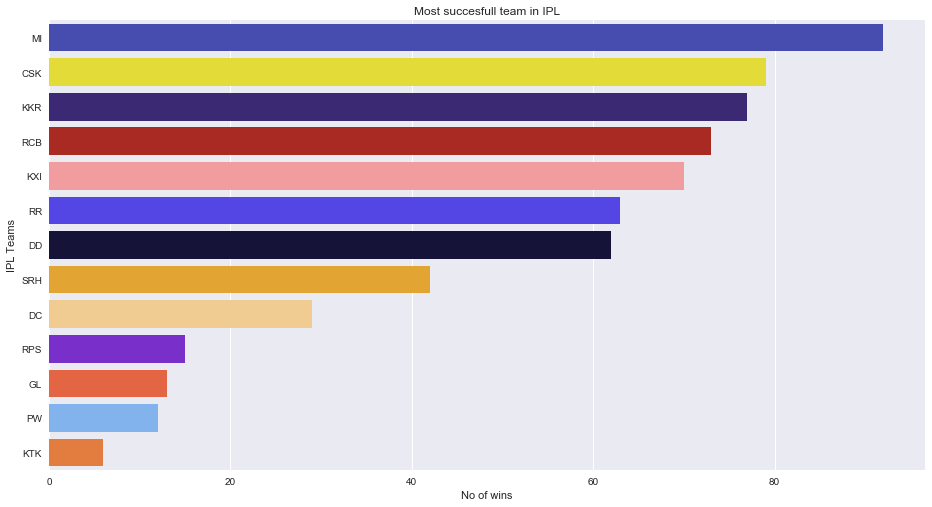

In [27]:
# Data visualization of the sucessful team in IPL

colors = ['#353EBF','#FFF61B','#361D7F','#BF150D','#FF8E90','#3E2BFF','#110C40','#FFAE16','#FFD083','#7716E5','#FF5529','#71B2FF','#FF7623']
team = df_all_matches_winners_sorted['Winner']
win_count = df_all_matches_winners_sorted['count']
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 8.27)
sns.set_style("whitegrid")
ax = sns.barplot(x=win_count, y=team, data=df_all_matches_winners,palette=colors);
ax.set(xlabel='No of wins', ylabel='IPL Teams',title = 'Most succesfull team in IPL',)
plt.show()

<div class="span25 alert alert-info">
<b>Used the team colors for the chart.</b>
MI seems to be the most succesful team in all of the IPL seasons with 92 wins in 10 seasons followed by CSK with 79 wins in 8 seasons and KKR with 77 in 10 seasons
</div>

In [28]:
df_all_matches_venues = df_all_matches.groupby(['city']).size().reset_index(name='count')
print(df_all_matches_venues.sort_values(by='count', ascending=False).head(8))

          city  count
21      Mumbai     85
2    Bangalore     66
20     Kolkata     61
9        Delhi     60
13   Hyderabad     49
7      Chennai     48
6   Chandigarh     46
15      Jaipur     33


<div class="span25 alert alert-warning">
For IPL 2018, we just need to consider top 8 grounds from the above list. Rest of the grounds can be ignored as some of them were used when IPL was played in South Africa, Dubai and Sharjah. Also when PW, RPS, GL and KTK were playing few new grounds were introduced as their home grounds. Since they are not playing in IPL 2018, we don't need to consider those grounds.
</div>

In [29]:
#create a dataframe to hold just home games and ignore the rest as per home_game flag
df_home_games = df_all_matches[df_all_matches['home_game'] == 1]

#calculate the total number of home games for 8 teams
csk_total_home_games = len(df_home_games[df_home_games['home_team'] == 'CSK'])
srh_total_home_games = len(df_home_games[df_home_games['home_team'] == 'SRH'])
mi_total_home_games = len(df_home_games[df_home_games['home_team'] == 'MI'])
kkr_total_home_games = len(df_home_games[df_home_games['home_team'] == 'KKR'])
kxi_total_home_games = len(df_home_games[df_home_games['home_team'] == 'KXI'])
rcb_total_home_games = len(df_home_games[df_home_games['home_team'] == 'RCB'])
dd_total_home_games = len(df_home_games[df_home_games['home_team'] == 'DD'])
rr_total_home_games = len(df_home_games[df_home_games['home_team'] == 'RR'])

#calculate the total number of home wins for 8 teams
csk_home_wins = len(df_home_games[(df_home_games.home_team == 'CSK') & (df_home_games.FTR == 'H')])
srh_home_wins = len(df_home_games[(df_home_games.home_team == 'SRH') & (df_home_games.FTR == 'H')])
mi_home_wins = len(df_home_games[(df_home_games.home_team == 'MI') & (df_home_games.FTR == 'H')])
kkr_home_wins = len(df_home_games[(df_home_games.home_team == 'KKR') & (df_home_games.FTR == 'H')])
kxi_home_wins = len(df_home_games[(df_home_games.home_team == 'KXI') & (df_home_games.FTR == 'H')])
rcb_home_wins = len(df_home_games[(df_home_games.home_team == 'RCB') & (df_home_games.FTR == 'H')])
dd_home_wins = len(df_home_games[(df_home_games.home_team == 'DD') & (df_home_games.FTR == 'H')])
rr_home_wins = len(df_home_games[(df_home_games.home_team == 'RR') & (df_home_games.FTR == 'H')])

#calculate the percentage of home wins
csk_home_win_per = round(csk_home_wins/csk_total_home_games * 100,0)
srh_home_win_per = round(srh_home_wins/srh_total_home_games * 100,0)
mi_home_win_per = round(mi_home_wins/mi_total_home_games * 100,0)
kkr_home_win_per = round(kkr_home_wins/kkr_total_home_games * 100,0)
kxi_home_win_per = round(kxi_home_wins/kxi_total_home_games * 100)
rcb_home_win_per = round(rcb_home_wins/rcb_total_home_games * 100)
dd_home_win_per = round(dd_home_wins/dd_total_home_games * 100)
rr_home_win_per = round(rr_home_wins/rr_total_home_games * 100)


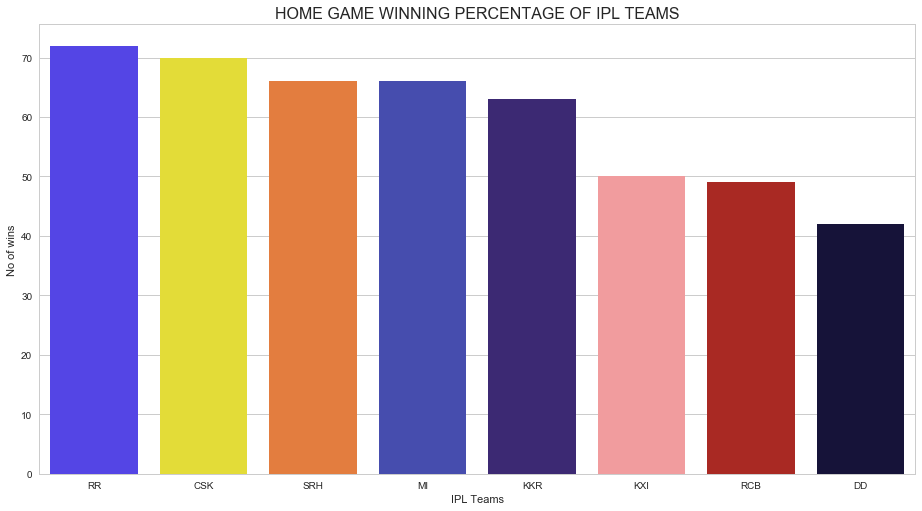

In [30]:
colors = ['#3E2BFF','#FFF61B','#FF7623','#353EBF','#361D7F','#FF8E90','#BF150D','#110C40']
win_per = [rr_home_win_per,csk_home_win_per,srh_home_win_per,mi_home_win_per,kkr_home_win_per,kxi_home_win_per,rcb_home_win_per,dd_home_win_per]
teams = ['RR','CSK','SRH','MI','KKR','KXI','RCB','DD']
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 8.27)
ax = sns.barplot(x=teams, y=win_per,palette=colors);
ax.set(ylabel='No of wins', xlabel='IPL Teams')
title = 'HOME GAME WINNING PERCENTAGE OF IPL TEAMS'
plt.title(title,fontsize = 16)
plt.show()

<div class="span25 alert alert-info">
The winning percentage of RR & CSK has been teriffic on their homeground. They have a highest winning percentage of 71% & 70.21% respectively. Even Sunrisers Hyderabad are closely behind with 65.71%. But one thing to notice is that all these three teams have played less games than the other 5 teams. That could be one of the reason why their win % is pretty good at home.
</div>

In [31]:
#calculate the total number of home games for 8 teams
csk_total_away_games = len(df_home_games[df_home_games['away_team'] == 'CSK'])
srh_total_away_games = len(df_home_games[df_home_games['away_team'] == 'SRH'])
mi_total_away_games = len(df_home_games[df_home_games['away_team'] == 'MI'])
kkr_total_away_games = len(df_home_games[df_home_games['away_team'] == 'KKR'])
kxi_total_away_games = len(df_home_games[df_home_games['away_team'] == 'KXI'])
rcb_total_away_games = len(df_home_games[df_home_games['away_team'] == 'RCB'])
dd_total_away_games = len(df_home_games[df_home_games['away_team'] == 'DD'])
rr_total_away_games = len(df_home_games[df_home_games['away_team'] == 'RR'])

#calculate the total number of home wins for 8 teams
csk_away_wins = len(df_home_games[(df_home_games.away_team == 'CSK') & (df_home_games.Winner == 'CSK')])
srh_away_wins = len(df_home_games[(df_home_games.away_team == 'SRH') & (df_home_games.Winner == 'SRH')])
mi_away_wins = len(df_home_games[(df_home_games.away_team == 'MI') & (df_home_games.Winner == 'MI')])
kkr_away_wins = len(df_home_games[(df_home_games.away_team == 'KKR') & (df_home_games.Winner == 'KKR')])
kxi_away_wins = len(df_home_games[(df_home_games.away_team == 'KXI') & (df_home_games.Winner == 'KXI')])
rcb_away_wins = len(df_home_games[(df_home_games.away_team == 'RCB') & (df_home_games.Winner == 'RCB')])
dd_away_wins = len(df_home_games[(df_home_games.away_team == 'DD') & (df_home_games.Winner == 'DD')])
rr_away_wins = len(df_home_games[(df_home_games.away_team == 'RR') & (df_home_games.Winner == 'RR')])

#calculate the percentage of home wins
csk_away_win_per = round(csk_away_wins/csk_total_away_games * 100,0)
srh_away_win_per = round(srh_away_wins/srh_total_away_games * 100,0)
mi_away_win_per = round(mi_away_wins/mi_total_away_games * 100,0)
kkr_away_win_per = round(kkr_away_wins/kkr_total_away_games * 100,0)
kxi_away_win_per = round(kxi_away_wins/kxi_total_away_games * 100)
rcb_away_win_per = round(rcb_away_wins/rcb_total_away_games * 100)
dd_away_win_per = round(dd_away_wins/dd_total_away_games * 100)
rr_away_win_per = round(rr_away_wins/rr_total_away_games * 100)


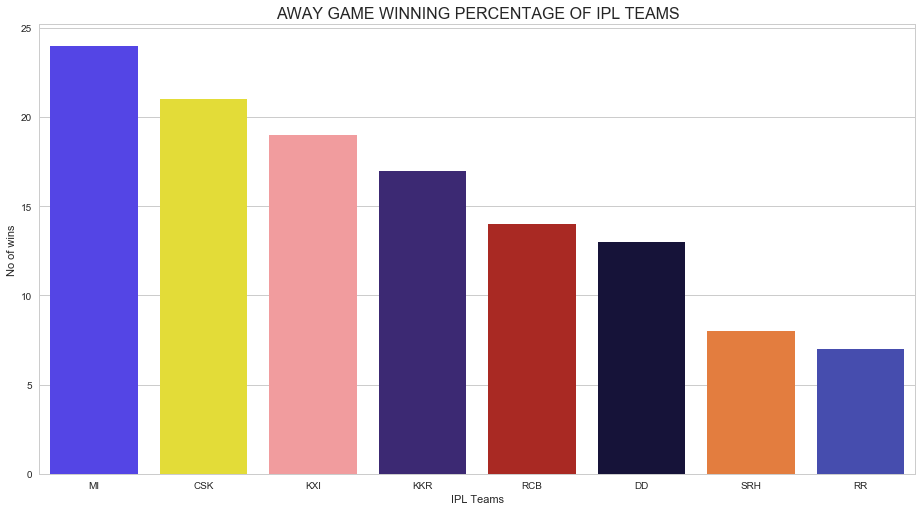

In [32]:
colors = ['#3E2BFF','#FFF61B','#FF8E90','#361D7F','#BF150D','#110C40','#FF7623','#353EBF']
win_per = [mi_away_win_per,csk_away_win_per,kxi_away_win_per,kkr_away_win_per,rcb_away_win_per,dd_away_win_per,srh_away_win_per,rr_away_win_per]
teams = ['MI','CSK','KXI','KKR','RCB','DD','SRH','RR']
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 8.27)
ax = sns.barplot(x=teams, y=win_per,palette=colors);
ax.set(ylabel='No of wins', xlabel='IPL Teams')
title = 'AWAY GAME WINNING PERCENTAGE OF IPL TEAMS'
plt.title(title,fontsize = 16)
plt.show()

<div class="span25 alert alert-info">
MI leads the way in winning away games with 60% closely followed by CSK with a 57%. CSK has been excellent in winning home games and second in winning away games. This is one of the reason why they were able to make it to all the playoffs in all the seasons they have played. Delhi has been poor both in away and home games and RR has been the worst traveller of all seasons.
</div>

In [33]:
#data preprocessing
import pandas as pd
#produces a prediction model in the form of an ensemble of weak prediction models, typically decision tree
#the outcome (dependent variable) has only a limited number of possible values. 
#Logistic Regression is used when response variable is categorical in nature.
from sklearn.linear_model import LogisticRegression
#A random forest is a meta estimator that fits a number of decision tree classifiers 
#on various sub-samples of the dataset and use averaging to improve the predictive 
#accuracy and control over-fitting.
from sklearn.ensemble import RandomForestClassifier
#a discriminative classifier formally defined by a separating hyperplane.
from sklearn.svm import SVC
#displayd data
from IPython.display import display
%matplotlib inline
#produces a prediction model in the form of an ensemble of weak prediction models, typically decision tree
import xgboost as xgb

In [34]:
# Read data and drop redundant column.
data_filtered = df_all_matches[df_all_matches['home_game'] == 1]
# Preview data
data_final = data_filtered[['id','HTBA','HTAL','HTBO','HTSC','HTWK','ATBA','ATAL','ATBO','ATSC','ATWK','FTR','HTP','ATP']]

In [35]:
data_final.shape

(474, 14)

<div class="span25 alert alert-warning">

<b>So this is the dataset we will use for our modeling as these are complete records which satisfies all conditions.</b>

</div>

### What is the win rate for home team?

In [36]:

# Total number of matches.
n_matches = data_final.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = data_final.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(data_final[data_final.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print ("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print ("Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 474
Number of features: 13
Number of matches won by home team: 259
Win rate of home team: 54.64%


### Plot a scatter matrix for all the features for the Away Team

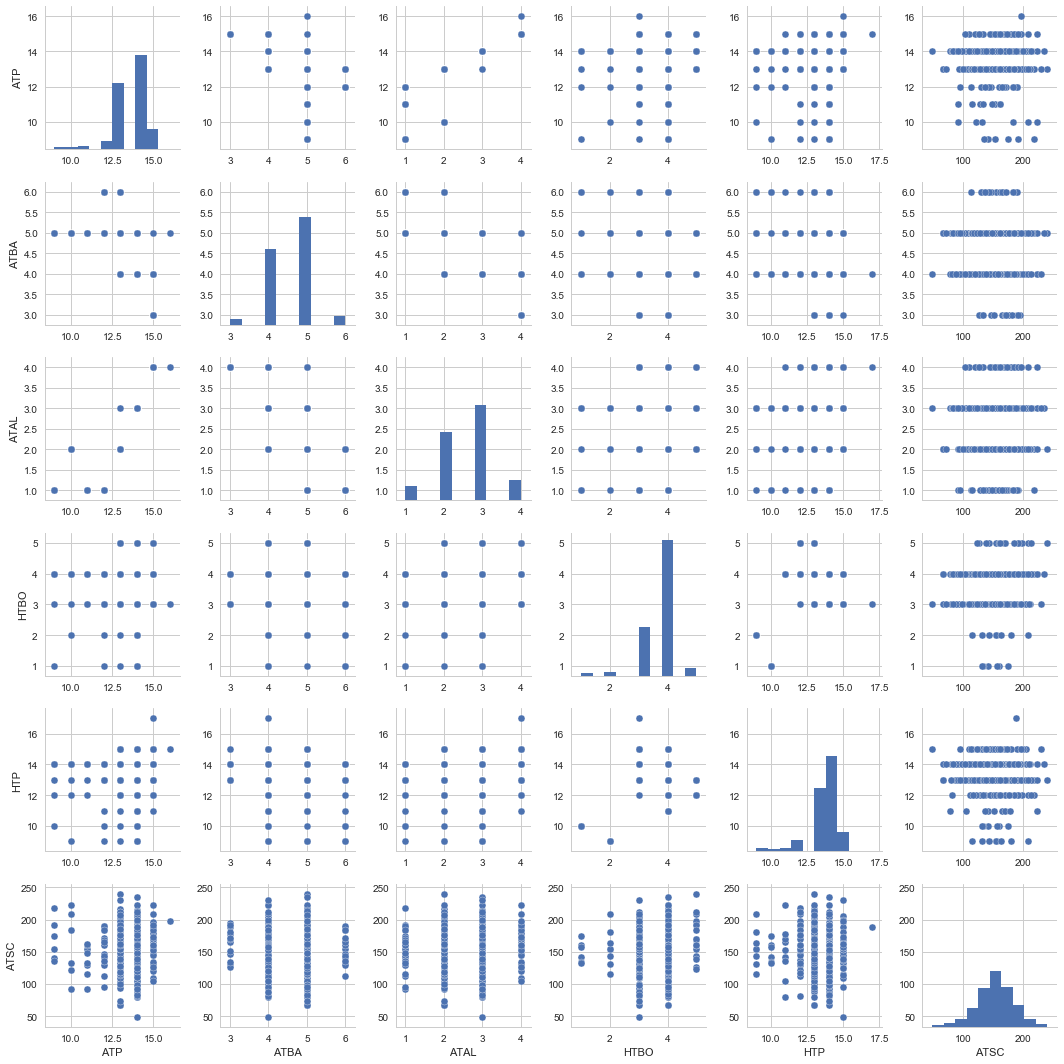

In [37]:
#set all the features for the away team along wth Home team points
#Just to understand how strong the opposition is

sns.set(style='whitegrid',context='notebook')
cols_a=['ATP','ATBA','ATAL','HTBO','HTP','ATSC']
sns.pairplot(data_final[cols_a],size=2.5)
plt.show()

<div class="span25 alert alert-warning">

Some things to note: ‘HTBO’ is the home team bowler. Surprisingly, we cannot read any positive or negative trend between Home team bowler and Away team score.I was expecting this to be positively linear.

We can also see that ATSC is normally distributed, but with some outliers.
</div>

### Plot a scatter matrix for all the features for the Home Team

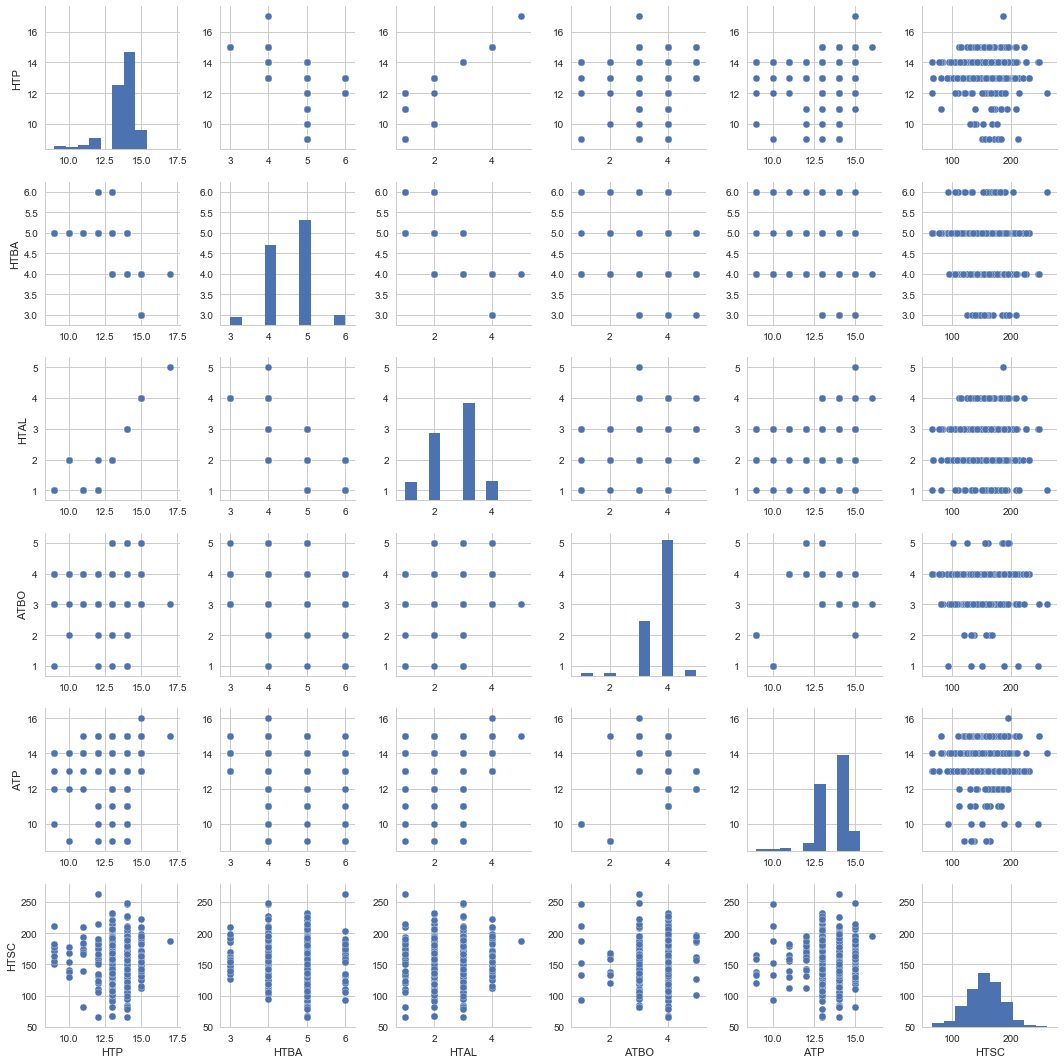

In [38]:
#set all the features for the Home team along wth Away team points
#Just to understand how strong the opposition is

sns.set(style='whitegrid',context='notebook')
cols_h=['HTP','HTBA','HTAL','ATBO','ATP','HTSC']
sns.pairplot(data_final[cols_h],size=2.5)
plt.show()

<div class="span25 alert alert-warning">

Same observation for home team. HTSC is normally distributed with no outliers. Not much of a trend or pattern we can derive from the ATBO & HTSC. I was expecting to see a trend between home team score and away team bowlers, but it doesn't seem to be there.

</div>

#### A correlation matrix to quantify linear relationship between the features

##### 1. Home Team

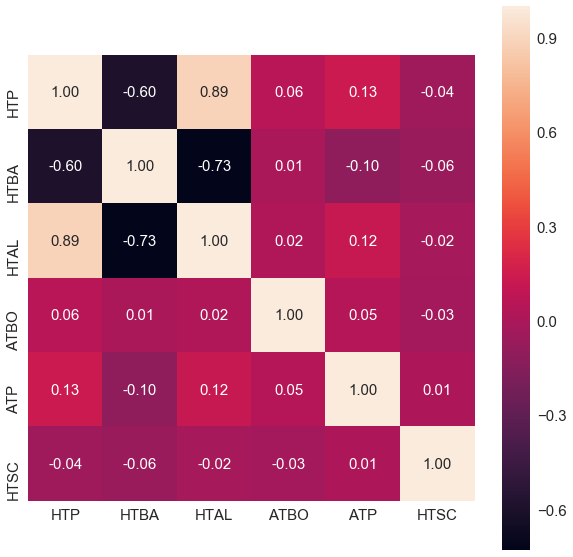

In [42]:
cm_h = np.corrcoef(data_final[cols_h].values.T)
sns.set(font_scale=1.5)
# Set figure width to 10 and height to 10
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm_h,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=cols_h,
                xticklabels=cols_h)
plt.show()

<div class="span25 alert alert-warning">
HTBA (Home Team Batsman) is the most negatively correlated with HTSC (Home Team Score) which is surprising because you normally expect a team to score more when they have more batsman in their team. But it looks like every time a team has played a match with more batsman, less they score. ATP (Away Team points is the 
</div>

##### 2. Away Team

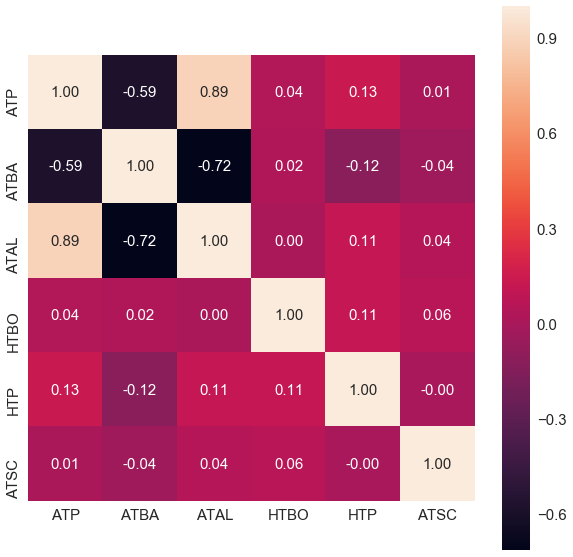

In [43]:
cm_a = np.corrcoef(data_final[cols_a].values.T)
sns.set(font_scale=1.5)
# Set figure width to 10 and height to 10
plt.figure(figsize=(10,10))
hm1 = sns.heatmap(cm_a,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=cols_a,
                xticklabels=cols_a)
plt.show()

<div class="span25 alert alert-warning">
Again ATBA (Away Team Batsman) is the most negatively correlated with ATSC (Away Team Score). Also Away Team Score has a positive realtion with Home Team Bowlers. So more specialized bowlers in opposition team, more runs you score. 

<br><br>
<b>
Note: As mentioned in the begining, we need to build more features to perfect the model. </b>
</div>